In [7]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
data = sns.load_dataset('iris')

In [9]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
scaler = StandardScaler()

In [11]:
col_a_escalar = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
datos_a_escalar = data.copy()

In [12]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(data[col_a_escalar])

In [13]:
datos_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


<Axes: xlabel='sepal_length', ylabel='petal_length'>

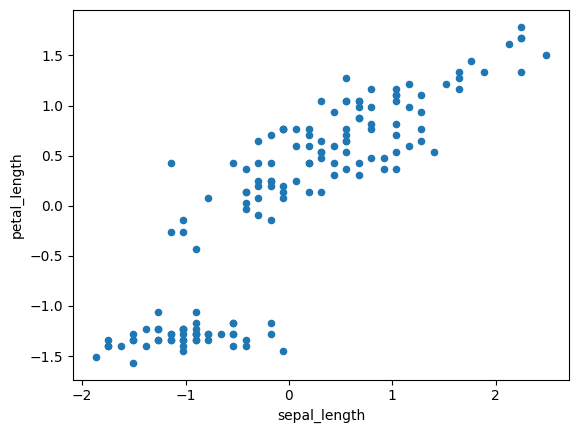

In [15]:
cluster_cols = ['sepal_length', 'petal_length']
datos_a_escalar.plot.scatter(x = 'sepal_length', y ='petal_length')

In [16]:
modelo = KMeans(n_clusters=5, random_state=12)

In [17]:
modelo.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=5, random_state=12)

In [18]:
datos_a_escalar['Segmento'] = modelo.predict(datos_a_escalar[cluster_cols])

In [19]:
datos_a_escalar.Segmento.value_counts()

Segmento
0    50
3    31
2    31
4    26
1    12
Name: count, dtype: int64

In [20]:
marcador = ['x', '*', '.', 'o', 's']

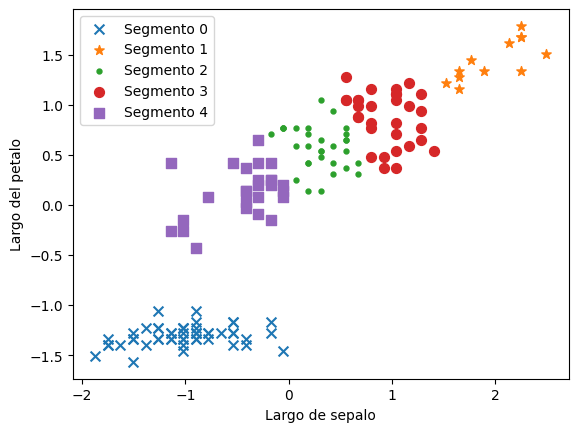

In [21]:
for segmento in range(5):
    temporal = datos_a_escalar[datos_a_escalar.Segmento == segmento]
   
    plt.scatter(temporal.sepal_length, temporal.petal_length, s=50, marker=marcador[segmento], label=f'Segmento {segmento}')

plt.xlabel('Largo de sepalo')
plt.ylabel('Largo del petalo')
plt.legend()
plt.show()